# Using Metrics


## Step 1 : Tips Data

Our tips data looks like this

```
| bill | tip | 
|------|-----| 
| 50   | 12  | 
| 30   | 7   | 
| 60   | 13  | 
| 40   | 8   | 
| 65   | 15  | 
| 20   | 5   | 
| 10   | 2   | 
| 15   | 2   | 
| 25   | 3   | 
| 35   | 4   | 
```

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
## Create some tips data in pandas

tip_data = pd.DataFrame({'bill' : [50.00, 30.00, 60.00, 40.00, 65.00, 20.00, 10.00, 15.00, 25.00, 35.00],
              'tip' : [12.00, 7.00, 13.00, 8.00, 15.00, 5.00, 2.00, 2.00, 3.00, 4.00]
             })

print(tip_data)
x = tip_data['bill'].values
y = tip_data['tip'].values
print('bill = ' + str(x))
print('tip = ' + str(y))

   bill   tip
0  50.0  12.0
1  30.0   7.0
2  60.0  13.0
3  40.0   8.0
4  65.0  15.0
5  20.0   5.0
6  10.0   2.0
7  15.0   2.0
8  25.0   3.0
9  35.0   4.0
bill = [50. 30. 60. 40. 65. 20. 10. 15. 25. 35.]
tip = [12.  7. 13.  8. 15.  5.  2.  2.  3.  4.]


## Step 2 : Define a Simple Linear Model
It only has ONE neuron with ONE input

**Add Metrics**  
Metrics can be specified as strings

- 'mse'   == 'mean_squared_error'
- 'mae'   == 'mean_absolute_error'
- 'mape'  == 'mean_absolute_percentage_error'

or can be done by keras package

```python
from keras import metrics
model.compile(loss='mse', optimizer='adam', 
              metrics=[metrics.mean_squared_error, metrics.mean_absolute_error])
```

We add metrics to `compile` step


In [7]:
import tensorflow as tf
from tensorflow import keras  # using TF.Keras !

model = tf.keras.Sequential()
model.add (keras.layers.Dense(units=1, input_shape=[1]))

# optimizer=tf.keras.optimizers.Adam(0.01)
optimizer=tf.keras.optimizers.RMSprop(0.01)


model.compile(optimizer=optimizer, loss='mean_squared_error', 
             metrics=['mse', 'mae'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


## Step 3 : Train The Neural Network
This is where we supply our model 'input' data to train on.  
**Goal : We want the loss to as small as possible (if zero, it is perfect model!)**

In [4]:
%%time
## TODO : start with 100 epochs,
##        - increase it (500, 1000) to see if accuracy improves
##        - try : verbose=0 ,  verbose=1,  verbose=2

history = model.fit (x,y, epochs=100, verbose=2)

Train on 10 samples
Epoch 1/100
10/10 - 0s - loss: 4261.5986 - mse: 4261.5986 - mae: 57.9208
Epoch 2/100
10/10 - 0s - loss: 4097.5669 - mse: 4097.5669 - mae: 56.7823
Epoch 3/100
10/10 - 0s - loss: 3981.6694 - mse: 3981.6694 - mae: 55.9642
Epoch 4/100
10/10 - 0s - loss: 3886.4492 - mse: 3886.4492 - mae: 55.2830
Epoch 5/100
10/10 - 0s - loss: 3803.2485 - mse: 3803.2485 - mae: 54.6810
Epoch 6/100
10/10 - 0s - loss: 3728.0645 - mse: 3728.0645 - mae: 54.1312
Epoch 7/100
10/10 - 0s - loss: 3658.6733 - mse: 3658.6733 - mae: 53.6189
Epoch 8/100
10/10 - 0s - loss: 3593.6929 - mse: 3593.6929 - mae: 53.1347
Epoch 9/100
10/10 - 0s - loss: 3532.2012 - mse: 3532.2012 - mae: 52.6725
Epoch 10/100
10/10 - 0s - loss: 3473.5476 - mse: 3473.5476 - mae: 52.2278
Epoch 11/100
10/10 - 0s - loss: 3417.2534 - mse: 3417.2534 - mae: 51.7974
Epoch 12/100
10/10 - 0s - loss: 3362.9595 - mse: 3362.9595 - mae: 51.3790
Epoch 13/100
10/10 - 0s - loss: 3310.3840 - mse: 3310.3840 - mae: 50.9706
Epoch 14/100
10/10 - 0s - l

## Step 4 : Predict 
Now that our model is ready, lets predict tip for $100.  

**==> Q : How good is our neural network tip calculator? :-)**

In [5]:
predicted = model.predict([100.])
print ("predicted tip : ", predicted)

predicted tip :  [[-42.555588]]


## Step 5 : See the Training Metrics
The `history` object has the training metrics

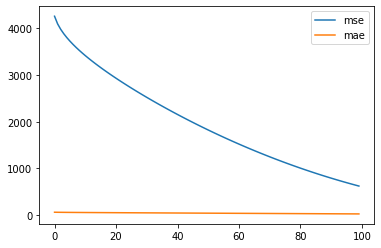

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='mse')
plt.plot(history.history['mae'], label='mae')
plt.legend()
plt.show()

## Discussion

- How many iterations does it take to converge?
- Try different optimizers from previous lab and evaluate how quickly they converge
- Also discuss which loss functions help faster convergence


### Good reads:
- https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/